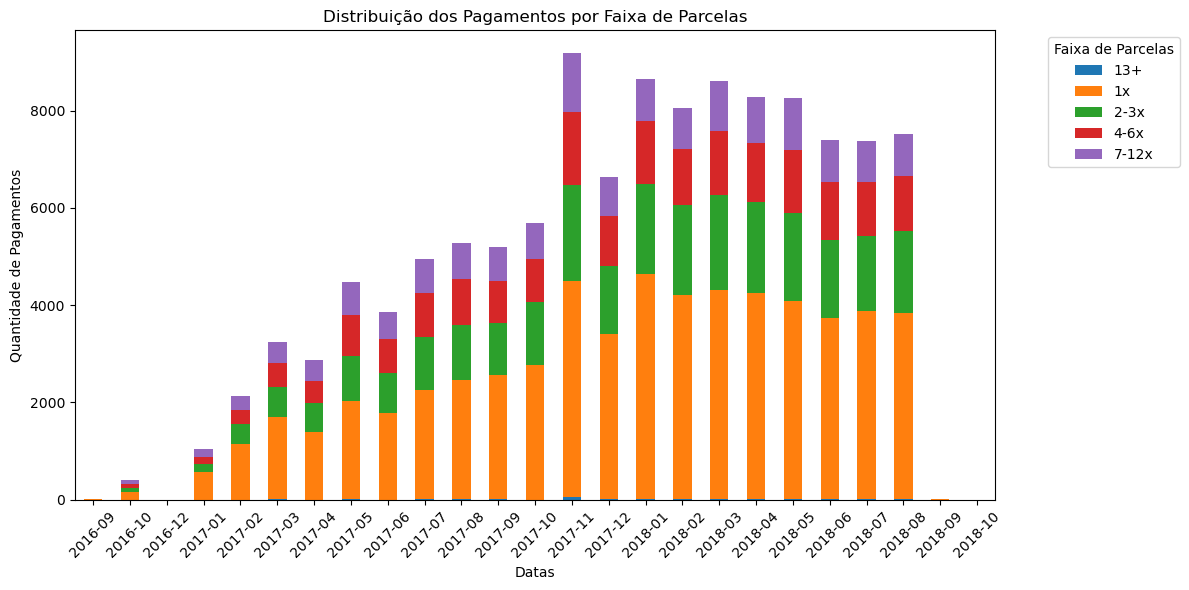

  faixa_parcelas       price
0            13+  285.696301
1             1x   91.120122
2           2-3x  102.495226
3           4-6x  137.438415
4          7-12x  245.768110


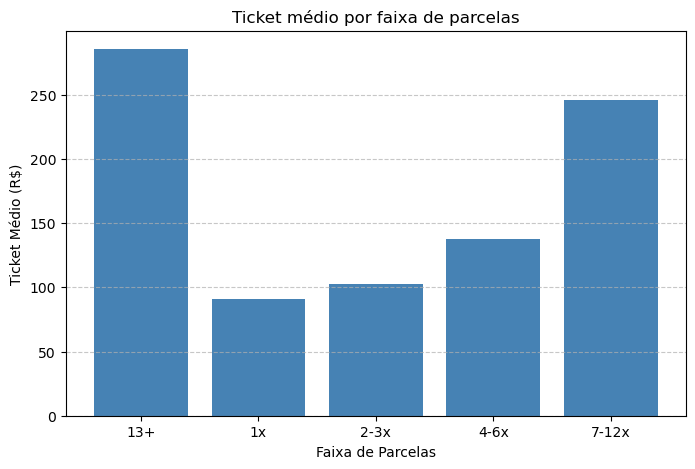

In [1]:
Curso_Analista_de_Dados_II


#  Notebook de projeto de conclusão do curso 'Analista de dados II', módulo 'Estatística'. 
#  Foi feita uma análise de dados no dataset obtido na plataforma Olist (E-comerce
#  Foco na forma de pagamento (prazo de parcelamento) e Ticket médio das parcelas.

import pandas as pd
import matplotlib.pyplot as plt

# Carregar apenas as colunas necessárias
df_olist = pd.read_csv(
    "C:/Users/User/Desktop/Caixa Verso/olist_data.csv",
    usecols=["ano_mes", "payment_installments", "price", "payment_type"]
)

# Converter ano_mes para datetime (apenas ano e mês)
df_olist["ano_mes"] = pd.to_datetime(df_olist["ano_mes"], format="%Y-%m")

# Substitui nulos pela moda
df_olist['payment_type'] = df_olist["payment_type"].fillna(df_olist['payment_type'].mode()[0])
df_olist['payment_installments'] = df_olist["payment_installments"].fillna(df_olist['payment_installments'].mode()[0])

# Criar categorias de parcelas
def classificar_parcelas(x):
    if x == 1:
        return "1x"
    elif 2 <= x <= 3:
        return "2-3x"
    elif 4 <= x <= 6:
        return "4-6x"
    elif 7 <= x <= 12:
        return "7-12x"
    else:
        return "13+"

df_olist["faixa_parcelas"] = df_olist["payment_installments"].apply(classificar_parcelas)

# Agrupar por data e faixa de parcelas
df_grouped = df_olist.groupby(["ano_mes", "faixa_parcelas"]).size().reset_index(name="quantidade")

# Pivotar para tabela
df_pivot = df_grouped.pivot(index="ano_mes", columns="faixa_parcelas", values="quantidade").fillna(0)

# Gráfico de barras empilhadas (sem hora no eixo X)
ax = df_pivot.plot(kind="bar", stacked=True, figsize=(12,6))
ax.set_title("Distribuição dos Pagamentos por Faixa de Parcelas")
ax.set_xlabel("Datas")
ax.set_ylabel("Quantidade de Pagamentos")
ax.legend(title="Faixa de Parcelas", bbox_to_anchor=(1.05, 1), loc="upper left")

# Formatar eixo X para mostrar apenas ano-mês
ax.set_xticklabels([d.strftime("%Y-%m") for d in df_pivot.index], rotation=45)

plt.tight_layout()
plt.savefig("grafico.pdf")
plt.show()

# Ticket médio por faixa de parcelas
ticket_medio = df_olist.groupby("faixa_parcelas")["price"].mean().reset_index()
print(ticket_medio)

# Gráfico de barras do ticket médio
plt.figure(figsize=(8,5))
plt.bar(ticket_medio["faixa_parcelas"], ticket_medio["price"], color="steelblue")
plt.title("Ticket médio por faixa de parcelas")
plt.xlabel("Faixa de Parcelas")
plt.ylabel("Ticket Médio (R$)")
plt.grid(axis="y", linestyle="--", alpha=0.7)
plt.show()

# Há sazonalidade, aumento em novembro/dezembro por causa de compras de fim de ano/blackfridey



In [ ]:
CONCLUSÕES

# Percebe-se um padrão de aumento na quantidade de pagamentos à vista (1x) e parceladas, mantendo a proporcionalidade.
# O ticket médio é maior nas faixas longas (7-12x ou 13+), isso indica que compras de maior valor tendem a ser parceladas.
# Há sazonalidade, aumento em novembro/dezembro por causa de compras de fim de ano/blackfridey